**Notas para contenedor de docker:**

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

```
docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_numerical -p 8888:8888 -d palmoreck/jupyterlab_numerical:1.1.0
```

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

```
docker stop jupyterlab_numerical
```


Documentación de la imagen de docker `palmoreck/jupyterlab_numerical:1.1.0` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/numerical).

---

Nota basada en [liga](https://www.dropbox.com/s/dfwk0y04ksgfilv/3.5.Aplicaciones_del_algebra_lineal_numerica.pdf?dl=0)

In [1]:
!pip3 install -q --user scikit-learn

You should consider upgrading via the 'pip install --upgrade pip' command.


# Componentes principales

Supóngase que en cada columna de $X \in \mathbb{R}^{m \times n}$ se tiene una observación de un **vector aleatorio** (tenemos $n$ vectores aleatorios de mediciones) y sea $X = U \Sigma V^T$ la descomposición en valores singulares de $X$ (ver [3.3.d.SVD](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/III.computo_matricial/3.3.d.SVD.ipynb)). Los vectores **singulares derechos** $v_i$ (columnas de la matriz $V$) son nombrados **ejes o direcciones principales** de $X$ y el vector $z_1 = X v_1 = \sigma u_1$ con $u_1$ vector **singular izquierdo** (primera columna de la matriz $U$) tiene **varianza muestral**:

$$\text{var}(z_1) = \text{var}(X v_1)= \text{var}(\sigma u_1) = \sigma_1^2 \text{var}(u_1) = \sigma_1^2 \left [ \frac{1}{m} \displaystyle \sum_{i=1}^m (u_1(i) - \bar{u}_1)^2 \right ]$$

donde: $u_1(i)$ es la $i$-ésima componente de $u_1$ y $\sigma_1$ es el máximo valor singular de $X$ también denotado como $\sigma_{\text{max}}$.

**Comentarios:**



Si la media de cada columna de $X$ es cero, $X$ se nombra **centrada**, entonces:

* $z_1$ tiene la **máxima varianza muestral** entre todas las combinaciones lineales de las columnas de $X$ pues:

$$\text{var}(z_1) = \frac{\sigma_1^2}{m} \displaystyle \sum_{i=1}^m u_1(i)^2 = \frac{\sigma_1^2}{m} ||u_1||_2^2 = \frac{\sigma_1^2}{m}.$$

* $z_1$ es la **primera componente principal**, $u_1 = \frac{1}{\sigma_1}z_1 = \frac{1}{\sigma_1}Xv_1$ se le nombra **primera componente principal normalizada** y $v_1$ es **primera dirección principal** de $X$ . 




* Calcular el vector con máxima varianza muestral se reduce a resolver el problema:

$$\displaystyle \max_{v \in \mathbb{R}^n - \{0\}} \frac{v^TX^TXv}{v^Tv}$$

el cual tiene solución cerrada dada por: $\sigma_1^2 = \displaystyle \max_{v \in \mathbb{R}^n - \{0\}} \frac{v^TX^TXv}{v^Tv}$, $v_1 = \text{argmax}_{v \in \mathbb{R}^n - \{0\}} \frac{v^TX^TXv}{v^Tv}$. 


* La segunda componente principal $z_2$ es aquella que tiene la máxima varianza muestral entre todas las combinaciones lineales de las columnas de $X$ y que es **ortogonal** (o que tenga covarianza igual a cero) con $z_1$. Este problema es equivalente a resolver:

$$\displaystyle \max_{v \in \mathbb{R}^n - \{0\}} \frac{v^TX^TXv}{v^Tv}$$



$$\text{sujeto a: } v^Tv_1 =0$$

con $v_1$ la primera dirección principal de $X$.

* La **matriz de correlaciones entre cada componente principal normalizada $u$'s y cada columna de $X^TX$** está dada por:

$$ C = \left (\frac{\sigma_1}{\sqrt{m}} v_1 \quad \frac{\sigma_2}{\sqrt{m}} v_2 \cdots \quad \frac{\sigma_p}{\sqrt{m}} v_p \right)$$

con $p = \min(m,n)$ pues si $x_1$ es la primer columna de $X^TX$ entonces:



$$
\begin{eqnarray}
\text{cov}(x_1,u_1) = \text{cov} \left ( \displaystyle \sum_{k=1}^p \sigma_k v_k(1) u_k, u_1 \right ) &=& \displaystyle \sum_{k=1}^p \text{cov} ( \sigma_k v_k(1) u_k, u_1 ) \nonumber \\
&=& \displaystyle \sum_{k=1}^p \sigma_k v_k(1) \text{cov} (u_k, u_1) \nonumber \\
&=& \sigma_1 v_1(1) \text{var}(u_1) \nonumber \\
&=& \frac{\sigma_1 v_1(1)}{m} \sum_{i=1}^m u_1(i)^2 \nonumber \\
&=& \frac{\sigma_1 v_1(1)}{m}
\end{eqnarray}
$$

Y como $\text{cor}(x_1,u_1) = \frac{\text{cov}(x_1,u_1)}{\sqrt{\text{var}(x_1)} \sqrt{\text{var}(u_1)}}$ se tiene:

$$\text{cor}(x_1,u_1) = \frac{\frac{\sigma_1 v_1(1)}{m}}{1 \cdot \sqrt{\frac{1}{m}}}  = \frac{\sigma_1 v_1(1)}{\sqrt{m}} $$

**Obs:** la matriz $\frac{1}{m-1}X^TX$ es la matriz de **varianzas y covarianzas** muestral la cual **siempre** es una matriz simétrica positiva semidefinida (aún si la $X$ no es centrada). Si $X$ además de ser centrada cumple que la varianza de cada una de sus columnas es $1$, $X$ se nombra **estandarizada**. La matriz $\frac{1}{m-1}X^TX$ en este caso es la matriz de **correlaciones**. 

## ¿Métodos numéricos para encontrar las componentes principales?

* Descomposición en valores singulares.

* [Método de la potencia](https://en.wikipedia.org/wiki/Power_iteration) en el que se utiliza el **[cociente de Rayleigh](https://en.wikipedia.org/wiki/Rayleigh_quotient)** para acelerar convergencia. Tal cociente toma la forma $\frac{y^TAy}{y^Ty}$ para $y \neq 0$.


* Métodos de descenso aplicados a problemas equivalentes al anterior como:

$$\displaystyle \max_{\hat{v} \in \mathbb{R}^n} \hat{v}^TX^TX\hat{v}$$

$$\text{sujeto a}: \hat{v}^T \hat{v} = 1.$$

Recuérdese que en los problemas de optimización convexa sin restricciones (Unconstrained Convex Optimization, ver [4.2.Algoritmos_para_UCO](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/IV.optimizacion_convexa_y_machine_learning/4.2.Algoritmos_para_UCO.ipynb)) se resuelven problemas de minimización, sin embargo con una modificación sencilla podemos resolver problemas de maximización.

In [1]:
import os

In [2]:
cur_directory = os.getcwd()

In [3]:
cur_directory

'/datos/MNO_desde_2018/ramas_repo/mno-master/temas/IV.optimizacion_convexa_y_machine_learning'

In [4]:
dir_alg_python = '/algoritmos/Python'

In [5]:
os.chdir(cur_directory + dir_alg_python)

In [6]:
import math

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA


from utils import compute_error
import algorithms_for_uco
import algorithms_for_ceco

In [7]:
dir_data = '/datos'

In [8]:
filename= cur_directory  + dir_data + '/miarchivo.txt'

In [9]:
filename

'/datos/MNO_desde_2018/ramas_repo/mno-master/temas/IV.optimizacion_convexa_y_machine_learning/datos/miarchivo.txt'

In [10]:
np.random.seed(2020)
mpoints=200
X = (np.random.rand(2,2)@np.random.normal(0,1,(2,mpoints))).T

In [11]:
np.linalg.cond(X.T@X)

101.9116499294094

In [12]:
X.shape

(200, 2)

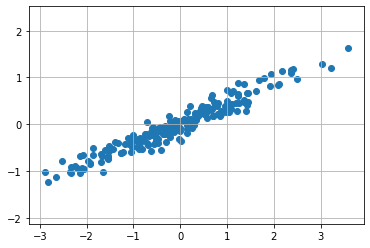

In [13]:
plt.scatter(X[:, 0], X[:, 1])
plt.grid()
plt.axis('equal');

In [14]:
pca = PCA(n_components=2,svd_solver='full')
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [15]:
print(pca.components_)

[[ 0.91945871  0.39318658]
 [ 0.39318658 -0.91945871]]


In [16]:
print(pca.explained_variance_)

[1.75356152 0.01718556]


In [17]:
pca.singular_values_

array([18.68043742,  1.84930434])

In [18]:
X_centered = X - X.mean(axis=0)

In [19]:
u,s,vt = np.linalg.svd(X_centered)

In [20]:
u

array([[-3.92315184e-02, -7.88091791e-02, -3.02343023e-02, ...,
         5.87848313e-02, -4.79986156e-02,  3.51581088e-02],
       [-5.85161278e-03, -6.30089685e-02, -6.43561950e-02, ...,
        -1.17529998e-02, -1.24292176e-04, -9.91874355e-03],
       [-2.83451178e-02, -6.51070088e-02,  9.95368600e-01, ...,
         7.29389669e-04, -1.18324907e-03,  2.61543153e-04],
       ...,
       [ 5.92894275e-02, -9.82019352e-03,  1.01961720e-03, ...,
         9.96480812e-01,  2.76433163e-03, -2.13720005e-03],
       [-4.81139375e-02, -1.66886481e-03, -1.39961298e-03, ...,
         2.72425782e-03,  9.97775818e-01,  1.62939053e-03],
       [ 3.55480885e-02, -8.75278360e-03,  4.41249365e-04, ...,
        -2.14911196e-03,  1.66308417e-03,  9.98687400e-01]])

In [21]:
s

array([18.68043742,  1.84930434])

In [22]:
vt.T[:,0]

array([0.91945871, 0.39318658])

In [23]:
vt.T[:,1]

array([-0.39318658,  0.91945871])

In [24]:
X_pca = pca.transform(X)

In [25]:
X_pca.shape

(200, 2)

In [26]:
X_pca_manual = X_centered@(vt.T)

In [27]:
np.linalg.norm(np.abs(X_pca_manual[:,0])-np.abs(X_pca[:,0]))/np.linalg.norm(X_pca[:,0])

0.0

In [28]:
np.linalg.norm(np.abs(X_pca_manual[:,1])-np.abs(X_pca[:,1]))/np.linalg.norm(X_pca[:,0])

0.0

# Mínimo valor singular

Función objetivo para el mínimo valor singular elevado al cuadrado, $\sigma_{\text{min}}^2$:

$$\displaystyle \min_{v \in \mathbb{R}^n - \{0\}} \frac{v^TX^TXv}{v^Tv}$$

Es equivalente resolver el problema:

$$\displaystyle \min_{\hat{v} \in \mathbb{R}^n} \hat{v}^TX^TX\hat{v}$$


$$\text{sujeto a}: \hat{v}^T \hat{v} = 1.$$

cuya solución es $\lambda_\text{min}(X^TX)$ que representa el mínimo eigenvalor de $X^TX$.

Este último problema es equivalente a resolver:

$$\displaystyle \min_{v \in \mathbb{R}^n, \lambda \in \mathbb{R}} \frac{1}{2}(v^TX^TXv - \lambda(v^Tv-1))$$

pues si $f_o(v, \lambda)$ es la función objetivo, entonces:

$$\nabla f_o(v,\lambda) = 
\left[
\begin{array}{c}
X^TX v - \lambda v \\
-\frac{1}{2}(v^Tv-1)
\end{array}
\right]
$$

y si igualamos a cero esta ecuación se tiene:

$$\nabla f_o(v,\lambda) = 
\left[
\begin{array}{c}
X^TX v - \lambda v \\
-\frac{1}{2}(v^Tv-1)
\end{array}
\right] = 0.
$$

Tal ecuación implica: $X^TXv = \lambda v$ y también $v^Tv = 1$ por lo que $(v, \lambda)$ es una pareja (eigenvector, eigenvalor), de hecho el eigenvector tiene norma $1$. Como queremos minimizar $f_o(v,\lambda)$ entonces el óptimo será $\lambda_\text{min}(X^TX)$ con $v^*$ eigenvector asociado.

Obsérvese que: 

$$\nabla^2 f_o(v,\lambda) = \left [ 
\begin{array}{cc}
X^TX - \lambda I & -v \\
-v^T & 0
\end{array}
\right ]
$$

**Método de Newton aplicado al problema anterior**

Centramos a $X$:

In [22]:
X_centered = X - X.mean(axis=0)
#other option X = (X - X.mean(axis=0)) / X.std()

In [23]:
def fo(x):
    v = x[0:(x.size-1)]
    value = x[x.size-1]
    matvec = X_centered@v
    return 1/2*(matvec.dot(matvec)-value*(v.dot(v)-1))

In [24]:
x_ast=np.concatenate((pca.components_[:,1],np.array([pca.singular_values_[1]**2])))

In [25]:
x_ast

array([ 0.39318658, -0.91945871,  3.41992653])

In [26]:
tol=1e-8
tol_backtracking=1e-14
maxiter=50
p_ast=fo(x_ast)


In [27]:
x_0 = np.array([1,0,5],dtype=float)


In [28]:
x_0

array([1., 0., 5.])

In [29]:
p_ast

1.7099632626913723

In [30]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo, x_0,tol, 
                                                       tol_backtracking, x_ast, p_ast, maxiter)

I    Normgf   Newton Decrement  Error x_ast   Error p_ast   line search   Condition of Hessian
0    3.16e+02    3.01e+02        5.41e-01      8.54e+01       ---           3.60e+03
1    2.45e+01    3.91e+01        2.43e+00      1.45e+01       1.00e+00      4.81e+02
2    5.46e+00    3.87e+00        1.03e+00      1.31e+00       1.00e+00      6.50e+02
3    1.09e+00    1.64e-01        2.83e-01      4.96e-02       1.00e+00      5.02e+02
4    7.29e-02    4.43e-04        2.04e-02      1.30e-04       1.00e+00      3.57e+02
5    2.17e-04    1.97e-09        6.07e-05      5.77e-10       1.00e+00      3.46e+02
Error of x with respect to x_ast: 6.07e-05
Approximate solution: [ 0.39318841 -0.91946288  3.41971024]


In [31]:
x

array([ 0.39318841, -0.91946288,  3.41971024])

In [32]:
total_of_iterations

6

In [33]:
x_ast

array([ 0.39318658, -0.91945871,  3.41992653])

El valor singular $\sigma_{\text{min}}$ es la raíz cuadrada del eigenvalor mínimo de $X^TX$, $\sqrt{\lambda_{\text{min}}(X^TX)}$, que acabamos de calcular:

In [34]:
np.sqrt(x[2])

1.8492458564827692

In [35]:
s

array([18.71436107,  1.8538009 ])

In [36]:
vt

array([[ 0.91962371,  0.39280051],
       [-0.39280051,  0.91962371]])

In [37]:
compute_error(x_ast,x)

6.0715087735377764e-05

# Máximo valor singular

Función objetivo para el máximo valor singular elevado al cuadrado, $\sigma_{\text{max}}^2$:

$$\displaystyle \max_{v \in \mathbb{R}^n - \{0\}} \frac{v^TX^TXv}{v^Tv}$$

Por el desarrollo anterior es equivalente resolver:

$$\displaystyle \min_{v \in \mathbb{R}^n, \lambda \in \mathbb{R}} - \left ( \frac{1}{2}(v^TX^TXv - \lambda(v^Tv-1)) \right )$$

In [38]:
def fo_max(x):
    return -fo(x)

In [39]:
x_ast=np.concatenate((pca.components_[:,0],np.array([pca.singular_values_[0]**2])))

In [40]:
x_ast

array([  0.91945871,   0.39318658, 348.9587423 ])

In [41]:
tol=1e-8
tol_backtracking=1e-14
maxiter=50
p_ast=fo_max(x_ast)


In [42]:
x_0 = np.array([1,1,500], dtype=float)

In [43]:
x_0

array([  1.,   1., 500.])

In [44]:
p_ast

-174.47937115079444

In [45]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo_max, x_0,tol, 
                                                       tol_backtracking, x_ast, p_ast, maxiter)

I    Normgf   Newton Decrement  Error x_ast   Error p_ast   line search   Condition of Hessian
0    3.28e+02    2.10e+02        4.33e-01      7.07e-01       ---           4.20e+04
1    5.64e+01    1.07e+01        7.26e-02      3.19e-02       1.00e+00      8.18e+03
2    3.25e+00    5.18e-02        4.47e-03      1.49e-04       1.00e+00      6.63e+02
3    2.82e-02    2.70e-05        7.99e-05      1.16e-08       1.00e+00      3.54e+02
4    1.39e-02    -4.93e-06        3.93e-05      2.94e-08       5.00e-01      3.41e+02
Error of x with respect to x_ast: 3.93e-05
Approximate solution: [  0.91911674   0.39303247 348.97243629]


In [46]:
x

array([  0.91911674,   0.39303247, 348.97243629])

In [47]:
total_of_iterations

5

In [48]:
x_ast

array([  0.91945871,   0.39318658, 348.9587423 ])

In [49]:
np.sqrt(x[2])

18.68080395204276

In [50]:
s

array([18.71436107,  1.8538009 ])

In [51]:
vt

array([[ 0.91962371,  0.39280051],
       [-0.39280051,  0.91962371]])

In [52]:
compute_error(x_ast,x)

3.925699828318319e-05

## Método de *deflation*

In [53]:
np.random.seed(2020)
mpoints=200
X = (np.random.rand(3,3)@np.random.normal(0,1,(3,mpoints))).T

In [54]:
np.linalg.cond(X.T@X)

700.544785759263

In [55]:
X.shape

(200, 3)

In [56]:
pca = PCA(n_components=2,svd_solver='full')
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [57]:
print(pca.components_)

[[ 0.84315718  0.28933414  0.45317956]
 [-0.45663143 -0.05963686  0.88765488]]


In [58]:
print(pca.explained_variance_)

[2.55109919 0.31794862]


In [59]:
pca.singular_values_

array([22.53150547,  7.9543558 ])

In [60]:
u,s,vt = np.linalg.svd(X)

In [61]:
s

array([22.56157551,  7.96458412,  0.85241576])

In [62]:
vt.T[:,0]

array([-0.84359574, -0.28954204, -0.45222962])

In [63]:
vt.T[:,1]

array([ 0.45561993,  0.05973815, -0.88816768])

In [64]:
x_ast=np.concatenate((pca.components_[0,:],np.array([pca.singular_values_[0]**2])))

In [65]:
x_ast

array([8.43157183e-01, 2.89334144e-01, 4.53179565e-01, 5.07668739e+02])

In [66]:
X_centered = X - X.mean(axis=0)
#other option X = (X - X.mean(axis=0)) / X.std()

In [67]:
tol=1e-8
tol_backtracking=1e-14
maxiter=50
p_ast=fo_max(x_ast)


In [68]:
x_0 = np.array([1,0,1,400], dtype=float)

In [69]:
x_0

array([  1.,   0.,   1., 400.])

In [70]:
p_ast

-253.834369353904

In [71]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo_max, x_0,tol, 
                                                       tol_backtracking, x_ast, p_ast, maxiter)

I    Normgf   Newton Decrement  Error x_ast   Error p_ast   line search   Condition of Hessian
0    2.49e+02    8.73e+01        2.12e-01      8.41e-02       ---           2.74e+04
1    7.41e+01    9.44e+00        1.06e-02      1.80e-02       1.00e+00      1.89e+03
2    1.10e+00    -4.42e-02        1.54e-03      9.03e-05       1.00e+00      6.91e+02
Error of x with respect to x_ast: 1.54e-03
Approximate solution: [8.67811089e-01 2.96955349e-01 4.67847927e-01 5.06886795e+02]


In [72]:
x

array([8.67811089e-01, 2.96955349e-01, 4.67847927e-01, 5.06886795e+02])

In [73]:
total_of_iterations

3

In [74]:
x_ast

array([8.43157183e-01, 2.89334144e-01, 4.53179565e-01, 5.07668739e+02])

In [75]:
np.sqrt(x[3])

22.5141465628605

In [76]:
compute_error(x_ast,x)

0.0015413691073102407

In [77]:
#X_centered = X - X.mean(axis=0)
#other option X = (X - X.mean(axis=0)) / X.std()

In [79]:
#s[0]

**Deflation**

In [80]:
X = X-s[0]*np.outer(u[:,0],vt[:,0])

In [81]:
X_centered = X - X.mean(axis=0)
#other option X = (X - X.mean(axis=0)) / X.std()

In [82]:
tol=1e-8
tol_backtracking=1e-14
maxiter=50
p_ast=fo_max(x_ast)


In [83]:
x_ast=np.concatenate((pca.components_[1,:],np.array([pca.singular_values_[1]**2])))

In [84]:
x_ast

array([-4.56631429e-01, -5.96368650e-02,  8.87654878e-01,  6.32717762e+01])

In [85]:
x_0 = np.array([-1,0,0,60], dtype=float)

In [86]:
x_0

array([-1.,  0.,  0., 60.])

In [87]:
p_ast

-21.607340394408087

In [88]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo_max, x_0,tol, 
                                                       tol_backtracking, x_ast, p_ast, maxiter)

I    Normgf   Newton Decrement  Error x_ast   Error p_ast   line search   Condition of Hessian
0    5.34e+01    5.62e+01        5.43e-02      6.95e-01       ---           2.37e+03
1    2.47e+01    1.16e+01        2.43e-02      1.45e-01       5.00e-01      3.85e+02
2    1.12e+00    1.58e-01        1.33e-02      4.25e-01       1.00e+00      2.93e+02
3    6.15e-02    8.42e-04        2.32e-02      4.29e-01       1.00e+00      2.42e+02
4    4.67e-04    -1.58e-07        2.42e-02      4.29e-01       1.00e+00      2.37e+02
Error of x with respect to x_ast: 2.42e-02
Approximate solution: [-0.45906412 -0.23192471  0.85737628 61.75293305]


In [89]:
x

array([-0.45906412, -0.23192471,  0.85737628, 61.75293305])

In [90]:
total_of_iterations

5

In [91]:
x_ast

array([-4.56631429e-01, -5.96368650e-02,  8.87654878e-01,  6.32717762e+01])

In [92]:
np.sqrt(x[3])

7.858303446081467

In [93]:
compute_error(x_ast,x)

0.024160762770256233

**Otro punto inicial**

In [94]:
x_0 = np.array([1,0,1,60], dtype=float)

In [95]:
x_0

array([ 1.,  0.,  1., 60.])

In [96]:
p_ast

-21.607340394408087

In [97]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo_max, x_0,tol, 
                                                       tol_backtracking, x_ast, p_ast, maxiter)

I    Normgf   Newton Decrement  Error x_ast   Error p_ast   line search   Condition of Hessian
0    9.76e+01    1.31e+02        5.66e-02      1.78e+00       ---           4.15e+03
1    7.14e+01    4.63e+01        5.02e-02      7.31e-01       2.50e-01      3.95e+02
2    3.28e+00    8.13e-01        1.16e-02      4.08e-01       1.00e+00      2.41e+02
3    2.21e-01    1.97e-02        2.10e-02      4.29e-01       1.00e+00      2.47e+02
4    8.58e-03    6.20e-06        2.40e-02      4.29e-01       1.00e+00      2.37e+02
5    2.40e-05    1.06e-11        2.42e-02      4.29e-01       1.00e+00      2.37e+02
Error of x with respect to x_ast: 2.42e-02
Approximate solution: [-0.45915131 -0.23196882  0.85753805 61.75252356]


In [98]:
x

array([-0.45915131, -0.23196882,  0.85753805, 61.75252356])

In [99]:
total_of_iterations

6

In [100]:
x_ast

array([-4.56631429e-01, -5.96368650e-02,  8.87654878e-01,  6.32717762e+01])

In [101]:
np.sqrt(x[3])

7.85827739168446

In [102]:
compute_error(x_ast,x)

0.024167221629122215

**Otro punto inicial**

In [103]:
x_0 = np.array([1,-.05,1,60], dtype=float)

In [104]:
x_0

array([ 1.e+00, -5.e-02,  1.e+00,  6.e+01])

In [105]:
p_ast

-21.607340394408087

In [106]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo_max, x_0,tol, 
                                                       tol_backtracking, x_ast, p_ast, maxiter)

I    Normgf   Newton Decrement  Error x_ast   Error p_ast   line search   Condition of Hessian
0    9.17e+01    1.36e+02        5.66e-02      1.91e+00       ---           4.11e+03
1    6.68e+01    5.01e+01        4.86e-02      8.14e-01       2.50e-01      3.70e+02
2    3.18e+00    8.13e-01        9.99e-03      4.08e-01       1.00e+00      2.58e+02
3    2.29e-01    1.74e-02        2.08e-02      4.29e-01       1.00e+00      2.51e+02
4    8.28e-03    1.91e-06        2.40e-02      4.29e-01       1.00e+00      2.37e+02
5    4.30e-05    -4.08e-10        2.42e-02      4.29e-01       1.00e+00      2.37e+02
Error of x with respect to x_ast: 2.42e-02
Approximate solution: [-0.45913816 -0.23196171  0.85751229 61.75251885]


In [107]:
x

array([-0.45913816, -0.23196171,  0.85751229, 61.75251885])

In [108]:
total_of_iterations

6

In [109]:
x_ast

array([-4.56631429e-01, -5.96368650e-02,  8.87654878e-01,  6.32717762e+01])

In [110]:
np.sqrt(x[3])

7.8582770918361255

In [111]:
compute_error(x_ast,x)

0.024167290623390986

**Otro punto inicial**

In [166]:
x_0 = np.array([1,-1,1,50], dtype=float)

In [167]:
x_0

array([ 1., -1.,  1., 50.])

In [168]:
p_ast

-21.607340394408087

In [169]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo_max, x_0,tol, 
                                                       tol_backtracking, x_ast, p_ast, maxiter)

I    Normgf   Newton Decrement  Error x_ast   Error p_ast   line search   Condition of Hessian
0    1.96e+02    -7.66e+02        2.12e-01      9.73e-01       ---           4.53e+04
Error of x with respect to x_ast: 2.12e-01
Approximate solution: [ 1. -1.  1. 50.]


In [170]:
x

array([ 1., -1.,  1., 50.])

In [171]:
total_of_iterations

1

In [172]:
x_ast

array([-4.56631429e-01, -5.96368650e-02,  8.87654878e-01,  6.32717762e+01])

In [173]:
np.sqrt(x[3])

7.0710678118654755

In [174]:
compute_error(x_ast,x)

0.21152159700068252